# North and South Chickamauga Creek USGS Stations Streamflow Data for HSPF Model

## Shuvashish Roy

### *We will use hydrofunctions package for flow data retrieval*

In [ ]:
pip show hydrofunctions

In [2]:
import hydrofunctions as hf
import pandas as pd
%matplotlib inline
import hydrofunctions as hf
import pandas as pd
%matplotlib inline
hf.__version__
pd.__version__
pd.__version__

'1.1.3'

In [3]:
sites = ['03566535', '03567500']  # USGS gage ids 
start = '2017-01-01'
end = '2021-01-01'
service = 'dv'
# Request our data.
data = hf.NWIS(sites, service, start, end, file='graphing-1.parquet') # you can also do it in csv
data # Verify that the data request went fine.

Reading data from graphing-1.parquet


USGS:03566535: NORTH CHICKAMAUGA CR AT MILE STRAIGHT, TN
    00045: <Day>  Precipitation, total, inches
    00060: <Day>  Discharge, cubic feet per second
USGS:03567500: SOUTH CHICKAMAUGA CREEK NEAR CHICKAMAUGA, TN
    00060: <Day>  Discharge, cubic feet per second
Start: 2017-01-01 00:00:00+00:00
End:   2021-01-01 00:00:00+00:00

 ### *See the precipitation and discharge columns of these two USGS gages from the dataset*


In [4]:
import pandas as pd
Q1=pd.read_parquet('graphing-1.parquet')
Q1.head()

,USGS:03566535:00045:00006,USGS:03566535:00045:00006_qualifiers,USGS:03566535:00060:00003,USGS:03566535:00060:00003_qualifiers,USGS:03567500:00060:00003,USGS:03567500:00060:00003_qualifiers
datetimeUTC,,,,,,
2017-01-01 00:00:00+00:00,0.43,A,120.0,A,268.0,A
2017-01-02 00:00:00+00:00,0.60,A,440.0,A,526.0,A
2017-01-03 00:00:00+00:00,0.09,A,684.0,A,954.0,A
2017-01-04 00:00:00+00:00,0.00,A,408.0,A,782.0,A
2017-01-05 00:00:00+00:00,0.00,A,249.0,A,455.0,A


###  *Extract only the Discharge data*

In [5]:
Q = data.df('00060') # q or 00060 for discharge data

In [6]:
Q.head(5)

,USGS:03566535:00060:00003,USGS:03567500:00060:00003
datetimeUTC,,
2017-01-01 00:00:00+00:00,120.0,268.0
2017-01-02 00:00:00+00:00,440.0,526.0
2017-01-03 00:00:00+00:00,684.0,954.0
2017-01-04 00:00:00+00:00,408.0,782.0
2017-01-05 00:00:00+00:00,249.0,455.0


In [7]:
Q.columns=["NORTH CHICKAMAUGA","SOUTH CHICKAMAUGA" ]
Q.index.names = ['Date']
Q.head()

,NORTH CHICKAMAUGA,SOUTH CHICKAMAUGA
Date,,
2017-01-01 00:00:00+00:00,120.0,268.0
2017-01-02 00:00:00+00:00,440.0,526.0
2017-01-03 00:00:00+00:00,684.0,954.0
2017-01-04 00:00:00+00:00,408.0,782.0
2017-01-05 00:00:00+00:00,249.0,455.0


### *Plot the daily discharge data* 

<AxesSubplot:xlabel='Date'>

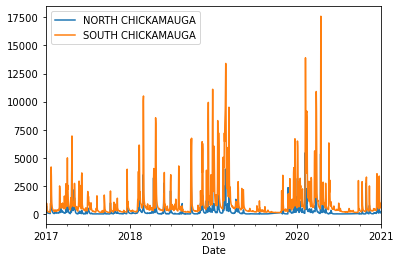

In [8]:
Q.plot()  # or data.df('discharge').plot() or data.df('00060').plot()


<AxesSubplot:xlabel='Date'>

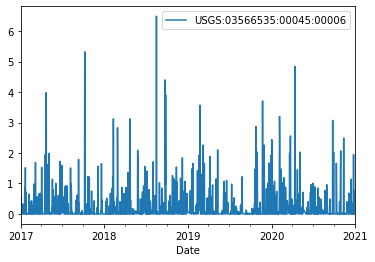

In [9]:
data.df('00045').plot() # precipitation plot 

### *Let's plot weekly monthly or quarterly data*

Text(0.5, 1.0, ' Weekly Flow')

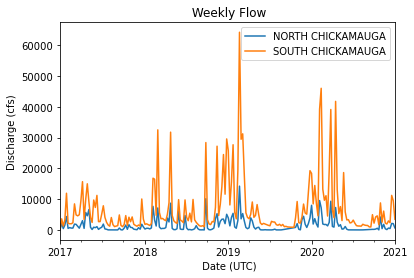

In [10]:
ax=Q.resample('W').sum().plot();  # use 'M or 'Q' for mothly and quarterly data plot 
ax.set_ylabel('Discharge (cfs)')
ax.set_xlabel(' Date (UTC)')
ax.set_title(' Weekly Flow')

### Let's check the annual trend 

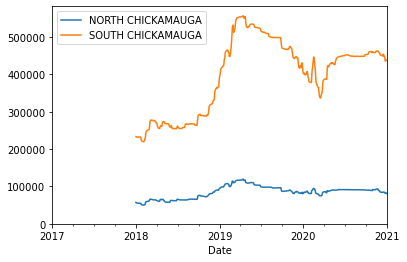

In [11]:
ax=Q.resample('D').sum().rolling(365).sum().plot() # yearly rolling mean 
ax.set_ylim(0,None);

####            In North Chickamauga stream, discharge increased until early 2019 and decreased after that. Every point indicates sum of discharge of previous 365 days




### *Get the total discharge of North and South Chick streams which can later be used as upstream boundry conditon for TN River EFDC model*

In [20]:
Q.loc[:,'Total']=Q.loc[:,'NORTH CHICKAMAUGA']+Q.loc[:,'SOUTH CHICKAMAUGA']

C:\Users\clhal\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [13]:
Q # check the Total flow 

,NORTH CHICKAMAUGA,SOUTH CHICKAMAUGA,Total
Date,,,
2017-01-01 00:00:00+00:00,120.0,268.0,388.0
2017-01-02 00:00:00+00:00,440.0,526.0,966.0
2017-01-03 00:00:00+00:00,684.0,954.0,1638.0
2017-01-04 00:00:00+00:00,408.0,782.0,1190.0
2017-01-05 00:00:00+00:00,249.0,455.0,704.0
...,...,...,...
2020-12-28 00:00:00+00:00,164.0,755.0,919.0
2020-12-29 00:00:00+00:00,126.0,652.0,778.0
2020-12-30 00:00:00+00:00,105.0,577.0,682.0


Text(0.5, 1.0, ' monthly Flow')

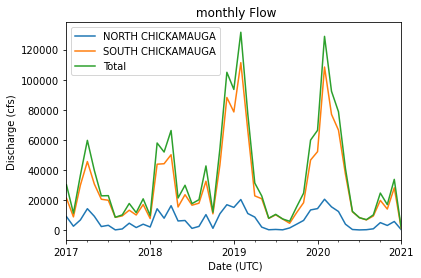

In [14]:
ax=Q.resample('m').sum().plot();  
ax.set_ylabel('Discharge (cfs)')
ax.set_xlabel(' Date (UTC)')
ax.set_title(' monthly Flow')

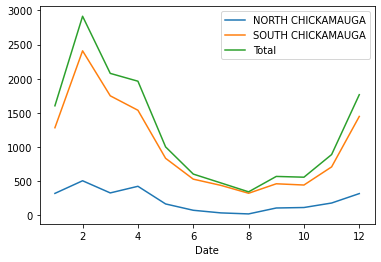

In [15]:
Q.groupby(Q.index.month).mean().plot();

In [16]:
df=Q
df.loc[:,'Month'] = df.index.month

C:\Users\clhal\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\clhal\anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [17]:
df


,NORTH CHICKAMAUGA,SOUTH CHICKAMAUGA,Total,Month
Date,,,,
2017-01-01 00:00:00+00:00,120.0,268.0,388.0,1
2017-01-02 00:00:00+00:00,440.0,526.0,966.0,1
2017-01-03 00:00:00+00:00,684.0,954.0,1638.0,1
2017-01-04 00:00:00+00:00,408.0,782.0,1190.0,1
2017-01-05 00:00:00+00:00,249.0,455.0,704.0,1
...,...,...,...,...
2020-12-28 00:00:00+00:00,164.0,755.0,919.0,12
2020-12-29 00:00:00+00:00,126.0,652.0,778.0,12
2020-12-30 00:00:00+00:00,105.0,577.0,682.0,12


In [18]:
Q

,NORTH CHICKAMAUGA,SOUTH CHICKAMAUGA,Total,Month
Date,,,,
2017-01-01 00:00:00+00:00,120.0,268.0,388.0,1
2017-01-02 00:00:00+00:00,440.0,526.0,966.0,1
2017-01-03 00:00:00+00:00,684.0,954.0,1638.0,1
2017-01-04 00:00:00+00:00,408.0,782.0,1190.0,1
2017-01-05 00:00:00+00:00,249.0,455.0,704.0,1
...,...,...,...,...
2020-12-28 00:00:00+00:00,164.0,755.0,919.0,12
2020-12-29 00:00:00+00:00,126.0,652.0,778.0,12
2020-12-30 00:00:00+00:00,105.0,577.0,682.0,12


# Let's draw some box plots 

Text(0.5, 1.0, 'South Chickamauga')

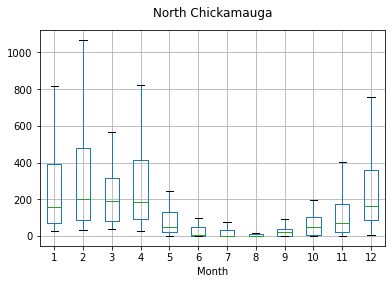

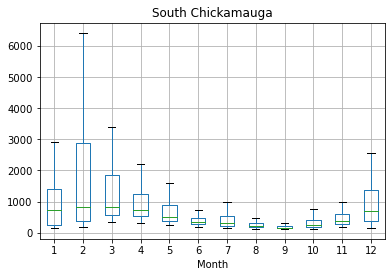

In [40]:
import matplotlib.pyplot as plt
ax = df.boxplot(column=['NORTH CHICKAMAUGA'], by='Month',showfliers=False)
plt.suptitle("North Chickamauga")
ax.set_title('')
ax = df.boxplot(column=['SOUTH CHICKAMAUGA'], by='Month',showfliers=False)
plt.suptitle("")
ax.set_title('South Chickamauga')